In [108]:
import pandas as pd
import numpy as np

# Text processing and feature extraction
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re

# Machine learning models and metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
# Deep learning with TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Plotting and visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

# Downloading things
import joblib
from google.colab import files


In [ ]:
df= pd.read_csv('/content/Combined Data.csv')

In [ ]:
df = df.drop(columns=['Unnamed: 0'])

In [ ]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


In [ ]:
df.isnull().sum()

statement    362
status         0
dtype: int64

In [ ]:
df['status'].value_counts()

status
Normal                  16351
Depression              15404
Suicidal                10653
Anxiety                  3888
Bipolar                  2877
Stress                   2669
Personality disorder     1201
Name: count, dtype: int64

In [ ]:
df['statement'] = df['statement'].fillna('')

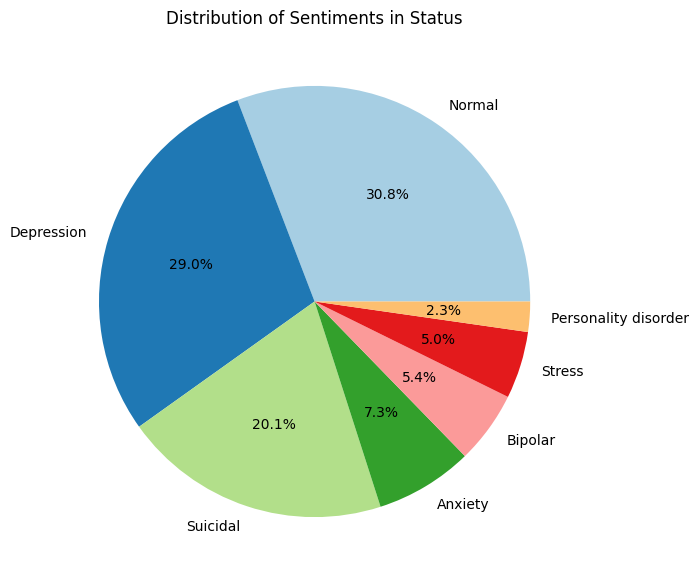

In [ ]:
status_counts = df['status'].value_counts()

plt.figure(figsize=(10, 7))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', colors=plt.cm.Paired(range(len(status_counts))))
plt.title('Distribution of Sentiments in Status')
plt.show()

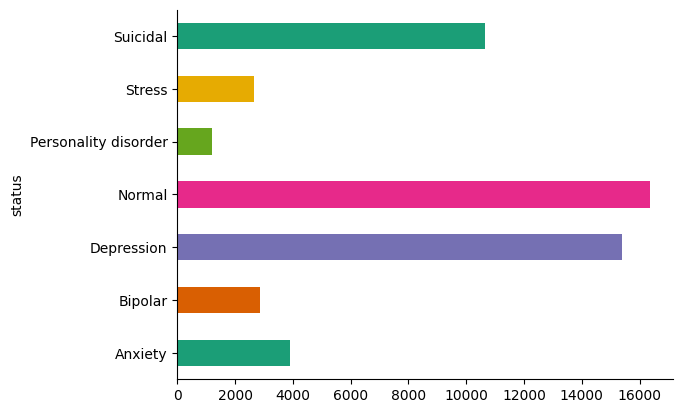

In [ ]:
df.groupby('status').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:

nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'[^\w\s]', '', text)
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return ' '.join(tokens)

df['cleaned_statement'] = df['statement'].apply(preprocess_text)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
pd.set_option('display.max_colwidth', None)

df_display = df[['statement', 'cleaned_statement']].head()
df_display.head()

,statement,cleaned_statement
0,oh my gosh,oh gosh
1,"trouble sleeping, confused mind, restless heart. All out of tune",trouble sleeping confused mind restless heart All tune
2,"All wrong, back off dear, forward doubt. Stay in a restless and restless place",All wrong back dear forward doubt Stay restless restless place
3,I've shifted my focus to something else but I'm still worried,Ive shifted focus something else Im still worried
4,"I'm restless and restless, it's been a month now, boy. What do you mean?",Im restless restless month boy What mean


In [116]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_statement'])
y= df['status']

In [117]:
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state= 42, stratify=y, test_size= .21)

In [118]:
def predict_text(sentence, vectorizer, model, label_encoder):

    transformed_sentence = vectorizer.transform([sentence])


    probabilities = model.predict_proba(transformed_sentence)


    predicted_class_index = np.argmax(probabilities, axis=1)[0]


    predicted_label = label_encoder.inverse_transform([predicted_class_index])[0]

    return predicted_label


In [119]:
max_words = 10000
max_sequence_len = 100

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(df['cleaned_statement'])
X = tokenizer.texts_to_sequences(df['cleaned_statement'])
X = pad_sequences(X, maxlen=max_sequence_len)


In [120]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['status'])

In [124]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)

y_pred = logistic_model.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

                      precision    recall  f1-score   support

             Anxiety       0.77      0.68      0.72       817
             Bipolar       0.79      0.65      0.71       604
          Depression       0.70      0.73      0.72      3235
              Normal       0.81      0.95      0.88      3434
Personality disorder       0.82      0.43      0.56       252
              Stress       0.63      0.41      0.50       561
            Suicidal       0.68      0.62      0.65      2237

            accuracy                           0.74     11140
           macro avg       0.74      0.64      0.68     11140
        weighted avg       0.74      0.74      0.74     11140



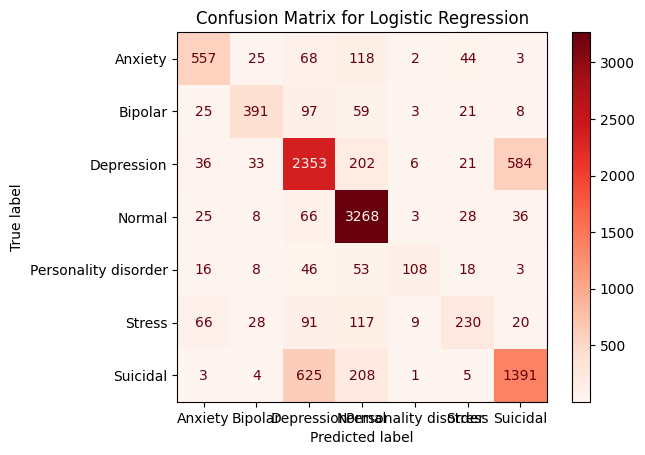

In [125]:
y_test = np.array(y_test)
y_pred = np.array(y_pred)

cm_logistic = confusion_matrix(y_test, y_pred, labels=label_encoder.classes_)
disp_logistic = ConfusionMatrixDisplay(confusion_matrix=cm_logistic, display_labels=label_encoder.classes_)
disp_logistic.plot(cmap=plt.cm.Reds)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [126]:
sentence = "I gonna die today"
predicted_label = predict_text(sentence, vectorizer, logistic_model, label_encoder)
print(f"\nPredicted Label: {predicted_label}")



Predicted Label: Suicidal


In [78]:
# Save the logistic regression model
joblib.dump(logistic_model, 'logistic_model.pkl')

# Save the vectorizer
joblib.dump(vectorizer, 'vectorizer.pkl')

# Save the label encoder
joblib.dump(label_encoder, 'label_encoder.pkl')

# Download the saved files
files.download('logistic_model.pkl')
files.download('vectorizer.pkl')
files.download('label_encoder.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Now lets create With Neural Network

In [71]:
max_words= 10000
max_sequence_len= 100
embedding_dim= 100

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [74]:
model= Sequential([Embedding(max_words, embedding_dim, input_length=max_sequence_len),
                   SpatialDropout1D(0.2),
                   LSTM(100, dropout=.2, recurrent_dropout=.2),
                   Dense(len(label_encoder.classes_), activation='softmax')])

In [75]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics= 'accuracy')

In [79]:
history= model.fit(X_train, y_train, epochs=5, batch_size= 64,validation_data=[X_test, y_test])

Epoch 1/5
581/581 [==============================] - 212s 365ms/step - loss: 0.7670 - accuracy: 0.6978 - val_loss: 0.7468 - val_accuracy: 0.6975
Epoch 2/5
581/581 [==============================] - 209s 361ms/step - loss: 0.6073 - accuracy: 0.7691 - val_loss: 0.6941 - val_accuracy: 0.7376
Epoch 3/5
581/581 [==============================] - 209s 360ms/step - loss: 0.5024 - accuracy: 0.8113 - val_loss: 0.6525 - val_accuracy: 0.7571
Epoch 4/5
581/581 [==============================] - 213s 367ms/step - loss: 0.4270 - accuracy: 0.8393 - val_loss: 0.6682 - val_accuracy: 0.7612
Epoch 5/5
581/581 [==============================] - 210s 362ms/step - loss: 0.3779 - accuracy: 0.8571 - val_loss: 0.7103 - val_accuracy: 0.7588


In [80]:
loss, accuracy = model.evaluate(X_test, y_test, verbose=1)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')

498/498 [==============================] - 20s 40ms/step - loss: 0.7103 - accuracy: 0.7588
Test Loss: 0.7103399634361267
Test Accuracy: 0.7588135600090027


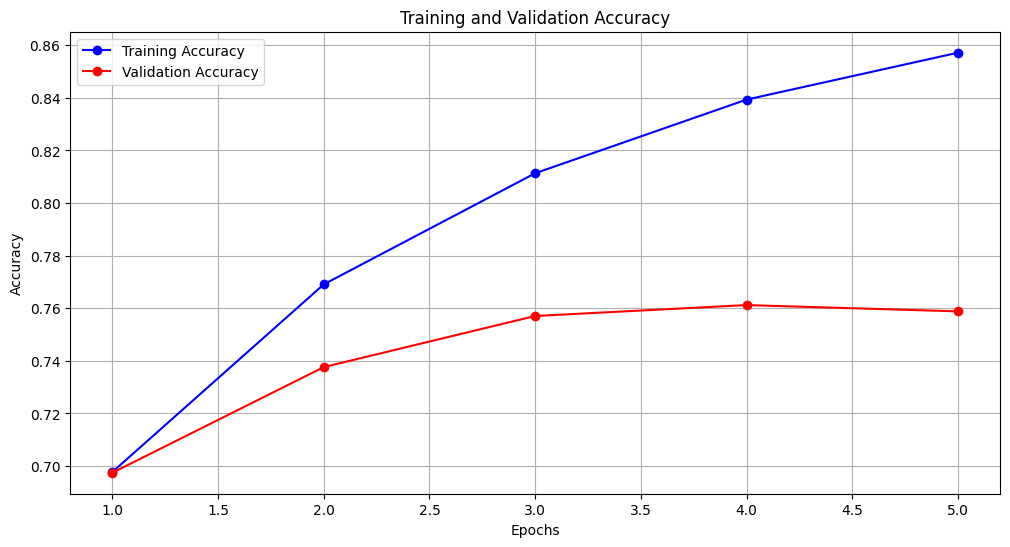

In [81]:
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, train_acc, 'bo-', label='Training Accuracy')
plt.plot(epochs, val_acc, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

498/498 [==============================] - 25s 50ms/step


<Figure size 2000x2000 with 0 Axes>

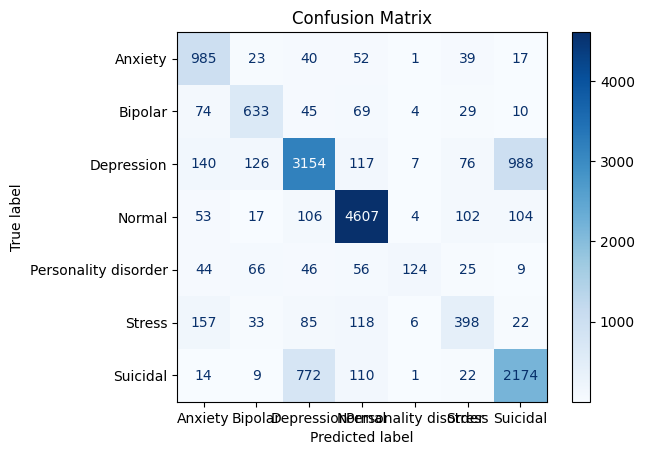

In [107]:
y_pred_nn = model.predict(X_test)
y_pred_classes = y_pred.argmax(axis=1)

cm = confusion_matrix(y_test, y_pred_classes, labels=range(len(label_encoder.classes_)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)

# Plot confusion matrix
plt.figure(figsize=(20, 20))
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()


## Now Lets Check the model

In [83]:
def preprocess_input_text(text, tokenizer, max_sequence_length):
    # Preprocess and convert text to sequences
    sequences = tokenizer.texts_to_sequences([text])
    padded_sequences = pad_sequences(sequences, maxlen=max_sequence_length)
    return padded_sequences


In [136]:
# Example input text
input_text = "im sorry i feel anxious"

# Preprocess the input text
preprocessed_text = preprocess_input_text(input_text, tokenizer, max_sequence_len)

# Make a prediction
predictions = model.predict(preprocessed_text)

# Convert predictions to class labels
predicted_class = predictions.argmax(axis=-1)
predicted_label = label_encoder.classes_[predicted_class][0]

print(f"Predicted label: {predicted_label}")


1/1 [==============================] - 0s 62ms/step
Predicted label: Anxiety


In [137]:
model.save('my_model.h5')
files.download('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning:

You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>